# Random Walk


As a physics student sometimes you see some random movement in nature like brownian motion(it's actually deterministic). we can use stochastic litrature to study brownian motion and find lots of valuable information about this process. Random walk is somehow one of the most instructive models that can help you understand how random process can model the nature.

for the beging let's see what random walk is. according to Wikipedia(https://en.wikipedia.org/wiki/Random_walk) random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

An elementary example of a random walk is the random walk on the integer number line, ${\displaystyle \mathbb {Z} }$ , which starts at 0 and at each step moves +1 or −1 with equal probability. Other examples include the path traced by a molecule as it travels in a liquid or a gas (see Brownian motion), the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality.

We know that you are passionate and want to explore all details of these process(joke :) ) but for the begining let's start with the simplest model, one dimensional random walk with same probability for right and left step.

1. the simplest model of random walk is a One-dimensional random walk, which starts at 0 and at each step moves +1 or −1 with equal probability. consider 10000_step 1d random walk. and use $10^5$ ensemble. in each ensemble begin from the origin(0) and record the endpoint at 10000th step. plot the PDF of these endpoints. also, calculate the first four moments of this PDF.

First moment is:-0.10828
Second moment is:10000.524355441597
Third moment is:-977.1551188431315
Forth moment is:299225536.5840464


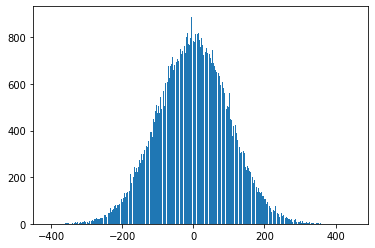

In [113]:
#code here
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
Ensemble=[]
i=0
steps=[]
while i<10**5:
  steps.append(np.random.choice(np.array([1,-1]),p=[1/2,1/2],size=10**4))
  i=i+1
  Ensemble.append(np.sum(steps))
  steps=[]
plt.hist(Ensemble,bins=500)
print("First moment is:"+str(np.sum(Ensemble)/len(Ensemble)))
print("Second moment is:"+str(sci.moment(Ensemble,2)))
print("Third moment is:"+str(sci.moment(Ensemble,3)))
print("Forth moment is:"+str(sci.moment(Ensemble,4)))
#It has odd moments that are usually much smaller than even moments,as expected from a normal distribution,although they are not exactly zero

now look at the plot you create. does it looklike a normal distribution? if yes isn't it strange cause we know that the probability is bionomial not guassian.


In [114]:
#explain here
#It seems like the random walk itself would be a binomial distribution,but when it is done and summed up multiple times,it would be more like a normal distribution.
#The third moment is expected to be zero in both the binomial and normal distribution...but it isn't,I cant understand the reason. Not a big enough sample maybe?

2.change the probability of jumping to right and left in a way that $P_{left} = 2 P_{right}$ and then repeat the process of Q1 again and evaluate the PDF and first four moments and cumulants. 

First moment(average value) is:3333.36964
Second central moment is:8966.8319262704
Third central moment is:-5728.408844968608
Forth central moment is:241354509.10210034
Second cumulant is:8966.8319262704
Third cumulant is:-5728.408844968608
Forth cumulant is:1.74755997433102e+17


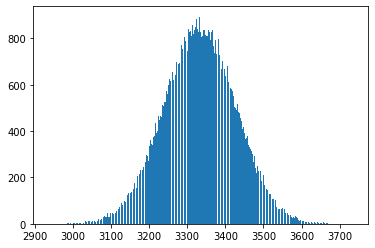

In [115]:
#code here
#reusing the first code with small changes:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
Ensemble=[]
i=0
steps=[]
while i<10**5:
  steps.append(np.random.choice(np.array([1,-1]),p=[2/3,1/3],size=10**4))
  i=i+1
  Ensemble.append(np.sum(steps))
  steps=[]
plt.hist(Ensemble,bins=500)
print("First moment(average value) is:"+str(np.sum(Ensemble)/len(Ensemble)))
print("Second central moment is:"+str(sci.moment(Ensemble,2)))
print("Third central moment is:"+str(sci.moment(Ensemble,3)))
print("Forth central moment is:"+str(sci.moment(Ensemble,4)))
print("Second cumulant is:"+str(sci.moment(Ensemble,2)))
print("Third cumulant is:"+str(sci.moment(Ensemble,3)))
print("Forth cumulant is:"+str(sci.moment(Ensemble,4)+3*(sci.moment(Ensemble,4)**2)))


according to your result, can you tell how the shape of PDF function related to its cumulants?

In [116]:
#explain here
#Obviously,the first and secound cumulants are the average,and variance respectvely. But something doesn't make sense at all,the third cumulant must be very close to zero,but is not.
#The 4th one is zero as expected,but the third is behaving oddly...this doesnt make sense.If this was a binomial distribution,the fourth cumulant would not be this small,if it was 
#a normal one,the third one would be zero. What am I doing wrong?

# Conditional Probability


Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? if Yes write a it's code to tell Us why and if your answer is No code it to prove the first group they are wrong:)

In [117]:
#code here
#Without switching,our winning probability is obviously 1/3,but i'll calculate that after this ,now I'm going to calculate for the case when we switch the door after the first choice.
#counting the wins with 1 and losses with 0
Doors=["a","b","c"]
History=[]
k=0
while k<10**4:
  #Fisrt "choosing" the door with the prize behind it:
  Prize=np.random.choice(Doors,p=[1/3,1/3,1/3])
  #Then,what the guest choose:
  Choice=np.random.choice(Doors,p=[1/3,1/3,1/3])
  #If our first choice was correct,we lose the game 
  if Prize==Choice:
    History.append(0)
  #If our first guess was wrong,we win.
  else:
    History.append(1)
  k=k+1
print("Winning probability after switching is: "+ str(sum(History)/len(History)))
#Calculating the probability when we don't switch:
Doors=["a","b","c"]
History=[]
k=0
while k<10**4:
  #Fisrt "choosing" the door with the prize behind it:
  Prize=np.random.choice(Doors,p=[1/3,1/3,1/3])
  #Then,what the guest choose:
  Choice=np.random.choice(Doors,p=[1/3,1/3,1/3])
  #If our first choice was correct,we win the game 
  if Prize==Choice:
    History.append(1)
  #If our first guess was wrong,we lose.
  else:
    History.append(0)
  k=k+1
print("Winning probability after not switching is: "+ str(sum(History)/len(History)))

Winning probability after switching is: 0.6673
Winning probability after not switching is: 0.332


# Centeral limit theorem

Choose a non-Gaussian distribution (uniform/bionomial/poission) and generate $10^5$ random variables for each of them.                                                      
a) plot the PDF of samples you created .                                                   
b) create $10^4$ random subset of length {2 , 5 , 10 , 20 , 100} from the first non-Gaussian distribution and caclculate mean of each subset, then plot the PDF of these means.                                                                       
c) what do you understand form comparing the original distribution with those five?


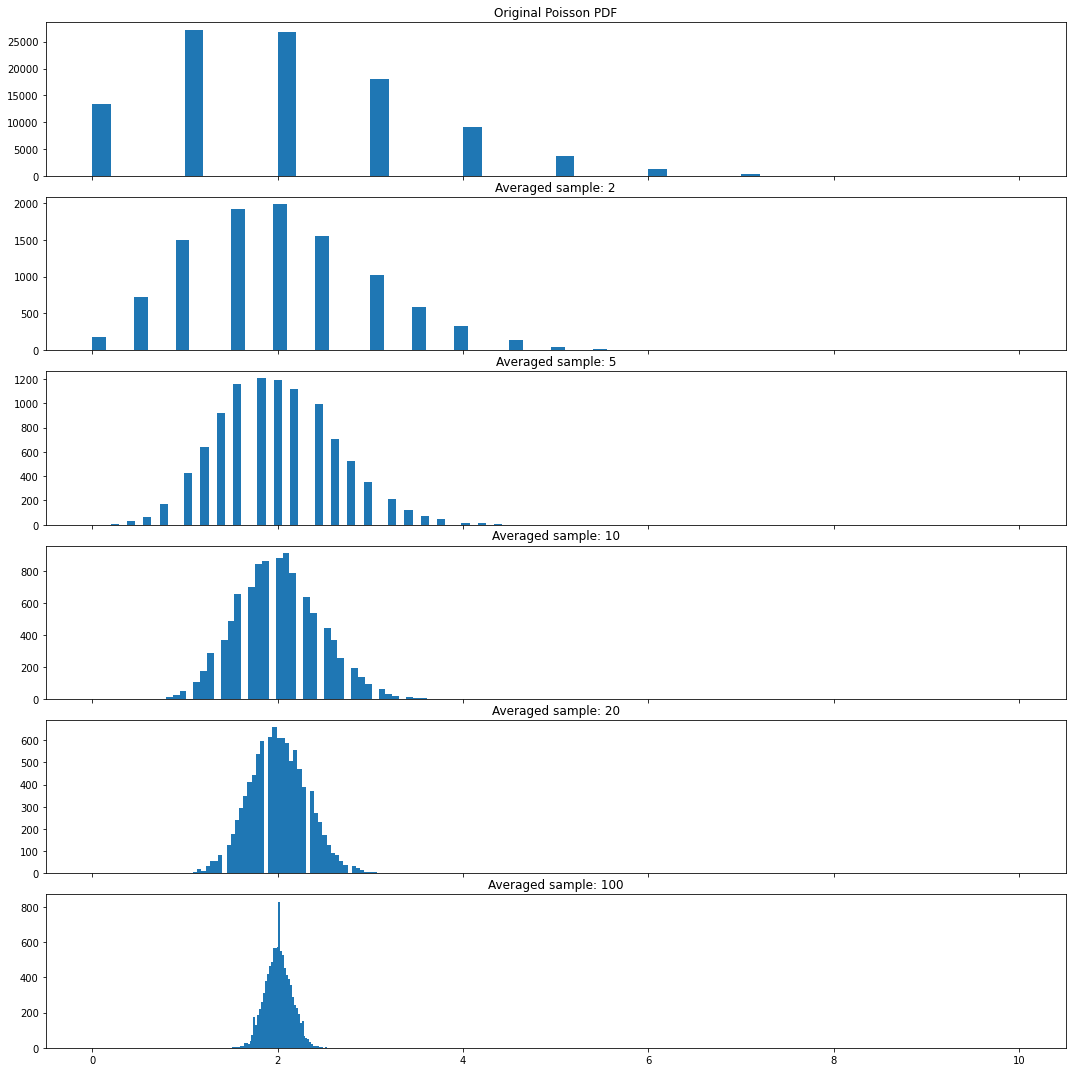

In [118]:
#code here
#Generating the Poisson distribution with lambda=2:
P=np.random.poisson(2,size=10**5)
fig, axs = plt.subplots(6,sharex=True,figsize=(15,15))
axs[0].hist(P,bins=50)
axs[0].set_title("Original Poisson PDF")
fig.tight_layout()
means=[]
pl=1
#Now sampling:
for i in [2,5,10,20,100]:
  Draw=np.random.choice(P,size=(10**4,i))
  k=0
  while k<10**4:
    means.append(np.sum(Draw[k])/i)
    k=k+1
  axs[pl].hist(means,bins=50)
  axs[pl].set_title("Averaged sample: "+ str(i))
  pl=pl+1
  means=[]
plt.show()

#It is apparent that the more our sampling size increases,the more our plot both "flattens" and also looks more and more gaussian.

# Poission Approximation

Use python libraries to generate bionomial and poission distributions for different N’s (remember $\lambda =NP$). Over plot them for N = {5, 10, 20, 50, 100, 200, 1000}
How does it behave as N increases? 



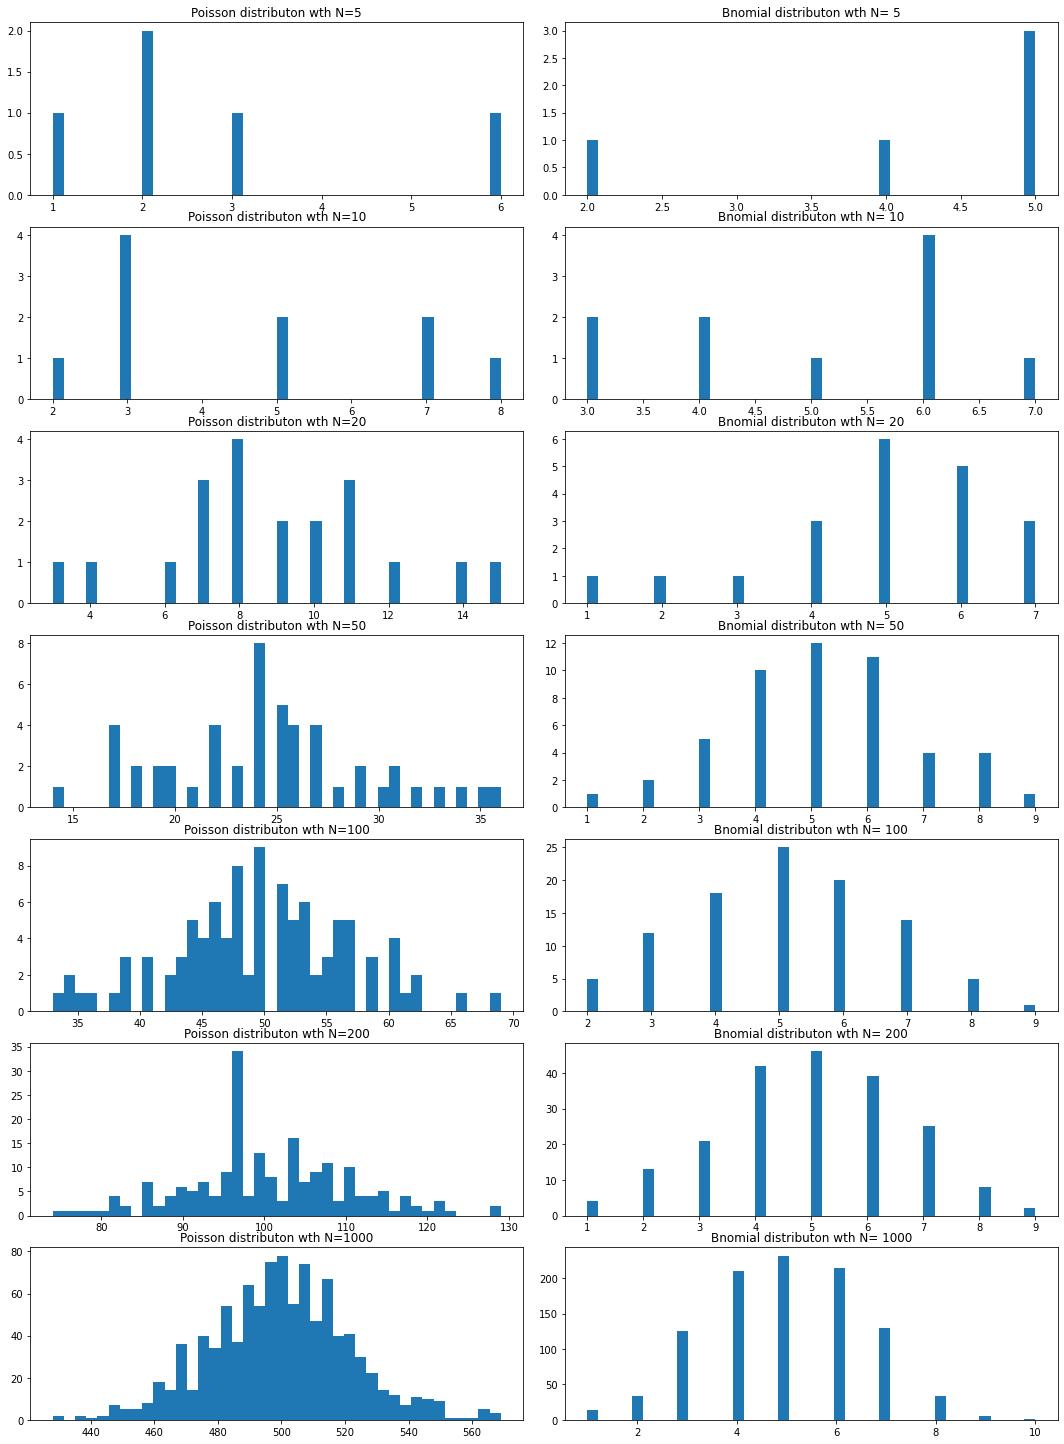

In [119]:
#code here

fig, axs = plt.subplots(7,2,figsize=(15,20))

fig.tight_layout()
pl=0
#Now sampling:
for i in [5,10,20,50,100,200,1000]:
  Po=np.random.poisson(0.5*i,i)
  Bi=np.random.binomial(10,0.5,size=i)
  axs[pl,0].hist(Po,bins=40)
  
  axs[pl,1].hist(Bi,bins=40)
  
  axs[pl,0].set_title("Poisson distributon wth N="+ str(i))
  axs[pl,1].set_title("Bnomial distributon wth N= "+ str(i))
  pl=pl+1
plt.show()
#In both cases,these distributions seem to "Converge" on a certain point,namely,the point that is most probable to happen.

# Box Muller Method

1- generate Normal distribution from uniform distribution (Box-Muller algorithm(https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)- do not need to derive and prove it. the topic will be included in lectures in the following week). Normal= zero mean, unit variance    
a)Sample many points from this distribution. plot the pdf of the sample (plot hist).             
                              


(array([1.000e+00, 2.000e+00, 0.000e+00, 7.000e+00, 7.000e+00, 1.600e+01,
        1.800e+01, 3.000e+01, 4.400e+01, 6.900e+01, 8.600e+01, 1.250e+02,
        1.890e+02, 2.180e+02, 3.090e+02, 4.260e+02, 5.250e+02, 6.840e+02,
        7.350e+02, 8.980e+02, 9.570e+02, 1.075e+03, 1.205e+03, 1.263e+03,
        1.167e+03, 1.241e+03, 1.110e+03, 1.233e+03, 1.058e+03, 9.800e+02,
        8.460e+02, 7.130e+02, 6.080e+02, 5.430e+02, 4.480e+02, 2.940e+02,
        2.570e+02, 1.790e+02, 1.470e+02, 1.020e+02, 5.900e+01, 4.000e+01,
        3.800e+01, 2.000e+01, 4.000e+00, 1.100e+01, 7.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00]),
 array([-3.93793314, -3.78085014, -3.62376715, -3.46668416, -3.30960116,
        -3.15251817, -2.99543517, -2.83835218, -2.68126919, -2.52418619,
        -2.3671032 , -2.21002021, -2.05293721, -1.89585422, -1.73877122,
        -1.58168823, -1.42460524, -1.26752224, -1.11043925, -0.95335626,
        -0.79627326, -0.63919027, -0.48210727, -0.32502428, -0.16794129,
        -0.

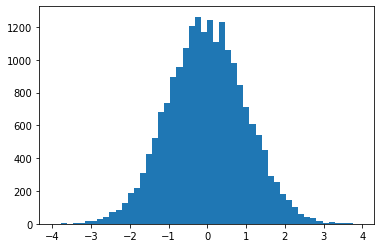

In [120]:
#code here
S=np.random.random_sample( size=10**5)
#sampling:
i=0
N_D=[]
Draw=[]
Draw=np.random.choice(S,size=(10**5,2))
while i<10**4:
  N_D.append(float(((-2*np.log(Draw[i][0]))**(1/2))*np.cos(2*np.pi*Draw[i][1])))
  N_D.append(float(((-2*np.log(Draw[i][0]))**(1/2))*np.sin(2*np.pi*Draw[i][1])))
  i=i+1  
plt.hist(N_D,bins=50)

b)Calculate mean of the sample. Its variance.

In [121]:
#code here
print("Average is:"+str(sum(N_D)/len(N_D)))
print("Variance is:"+str(np.var(N_D)))
#Thank God for Numpy

Average is:-0.011682050519578008
Variance is:1.0088436107766863


c)Overplot the pdf now, using this mean and variance (on the plot hist). Also use the mean and std deviation functions from python library. Do they agree?

(array([  1.,   1.,   2.,   6.,  11.,  18.,  13.,  31.,  31.,  58.,  93.,
         94., 129., 162., 201., 257., 296., 319., 408., 438., 482., 511.,
        541., 578., 554., 556., 507., 496., 502., 455., 410., 349., 270.,
        291., 224., 149., 136., 125.,  74.,  66.,  51.,  34.,  18.,  15.,
         13.,   8.,   7.,   2.,   4.,   3.]),
 array([-3.57939379, -3.43488832, -3.29038284, -3.14587737, -3.00137189,
        -2.85686642, -2.71236095, -2.56785547, -2.42335   , -2.27884452,
        -2.13433905, -1.98983357, -1.8453281 , -1.70082263, -1.55631715,
        -1.41181168, -1.2673062 , -1.12280073, -0.97829526, -0.83378978,
        -0.68928431, -0.54477883, -0.40027336, -0.25576789, -0.11126241,
         0.03324306,  0.17774854,  0.32225401,  0.46675949,  0.61126496,
         0.75577043,  0.90027591,  1.04478138,  1.18928686,  1.33379233,
         1.4782978 ,  1.62280328,  1.76730875,  1.91181423,  2.0563197 ,
         2.20082517,  2.34533065,  2.48983612,  2.6343416 ,  2.77884707,
 

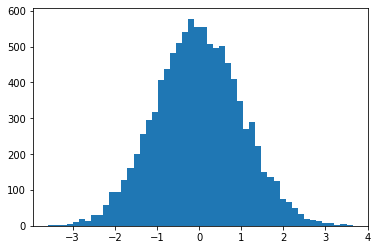

In [122]:
#code here
New_N=np.random.normal((sum(N_D)/len(N_D)),(np.var(N_D)),size=10**4)
plt.hist(New_N,bins=50)
#Although they are the same distribution,I don't think they need to completely agree,because these are two different samples.

d)Now that you have your Normal distribution, how can you turn it into a Gaussian distribution with  given mean and variance? For example mean=2, and std dev=4 ?   

Average is:1.9532717979216865
Variance is:4.017648288791215


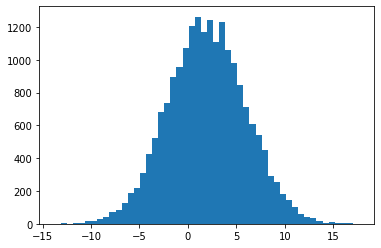

In [123]:
#code here
#For achieving the mean,I would add a number to all the generated numbers,for std dev,I would multiply the numbers.
N_D1 = [4*x+2 for x in N_D]
plt.hist(N_D1,bins=50)
print("Average is:"+str(sum(N_D1)/len(N_D1)))
print("Variance is:"+str(np.std(N_D1)))
#This was what I understood from the question,hope I got it right.

there are two problems left, but you can choose one of them to solve.(we highly recommend you to solve both of them)

# Nice Matrix

A matrix of size n$\times$n which include numbers of {1,2,3,...,$n^2$} is called nice, if sum of all rows and columns  are the same. write a code that get n as a input and return a n$\times$n Nice Matrix. print out the examples of Nice Matrix for n = 4,5,6

In [125]:
#code here
#I sadly have no idea what is going on,although this was discussed in the class,the algorithms just seem like "magic" to me,I simply can't figure them out.
#Although I found the codes for them,just using them again would be meaningless.


# Honest and Liers

Suppose there 16 People sit around a circular table.  ٍEach claims that the two people next to him/her are liars. How many liars are there in the crowd? 

In [126]:
#code here 
#I admit defeat on this one aswell,I have an idea that how this should be solved based on previous explanation,but I have no idea how to implement it.
#Numpy arrays are not flexible enough for this,they require fixed sizes for arrays,but I need something a lot more flexible.
#You can't have multi dimensional lists in python either,which was my plan to solve this,making the arrangements and saving them in a list as I go forward.
